#### Dataset

In [2]:
# banknotes.csv
# https://mitu.co.in/dataset

#### Import all libraries

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#### Load the data

In [6]:
df = pd.read_csv('banknotes.csv')

In [7]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [8]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

#### Separate the input and output variables

In [10]:
# input variables 
x = df.drop('Class', axis = 1)

# output variables 
y = df['Class']

In [11]:
x

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


#### Explore the Data

In [13]:
set(y)

{0, 1}

In [14]:
x.describe()

,Variance,Skewness,Curtosis,Entropy
count,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657
std,2.842763,5.869047,4.310030,2.101013
min,-7.042100,-13.773100,-5.286100,-8.548200
25%,-1.773000,-1.708200,-1.574975,-2.413450
50%,0.496180,2.319650,0.616630,-0.586650
75%,2.821475,6.814625,3.179250,0.394810
max,6.824800,12.951600,17.927400,2.449500


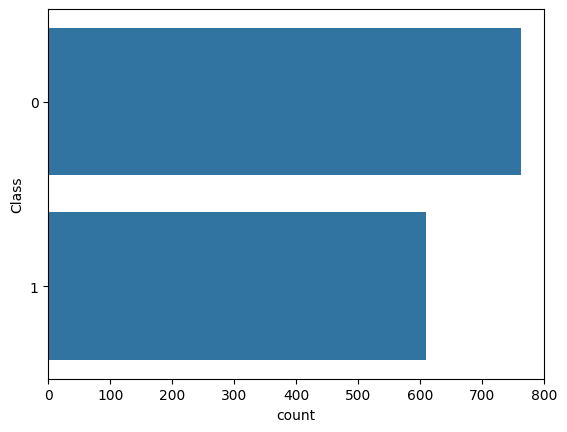

In [15]:
sns.countplot(y = y);

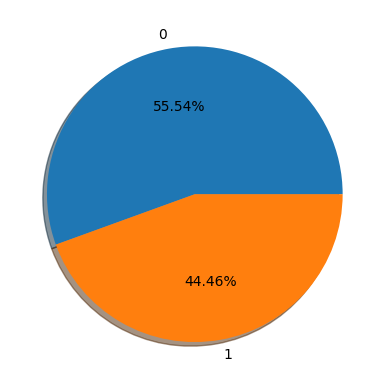

In [25]:
plt.pie(y.value_counts(), labels=y.value_counts().index, 
        autopct='%2.2f%%', shadow=True);

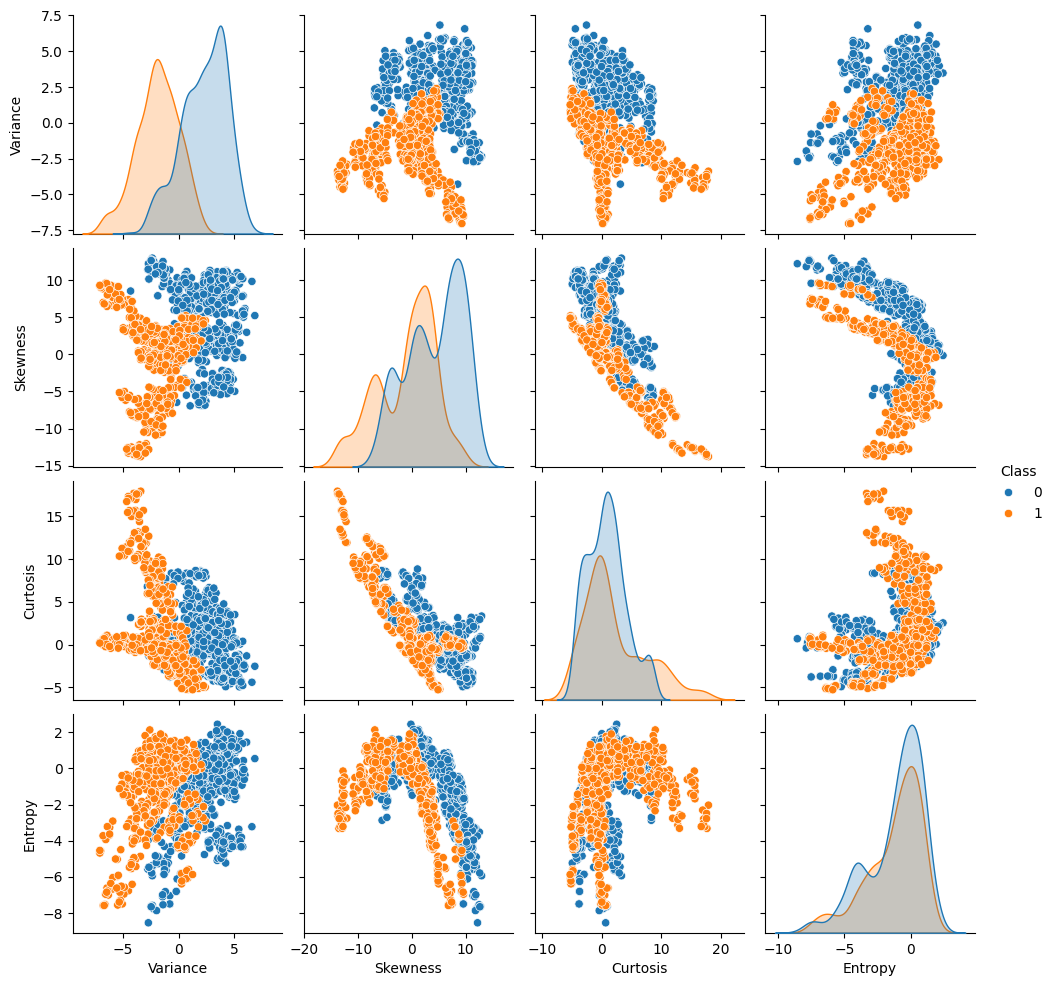

In [27]:
sns.pairplot(df, hue = 'Class');

#### Cross Validation

In [32]:
from sklearn.model_selection import train_test_split

In [43]:
x_train ,x_test, y_train, y_test = train_test_split(
    x, y, random_state=0, stratify=y) 

In [44]:
x_train.shape

(1029, 4)

In [45]:
x_test.shape

(343, 4)

In [46]:
y_train.value_counts() / len(y_train) * 100

Class
0    55.490768
1    44.509232
Name: count, dtype: float64

In [47]:
y_test.value_counts() / len(y_test) * 100

Class
0    55.685131
1    44.314869
Name: count, dtype: float64

In [48]:
y.value_counts() / len(y) * 100

Class
0    55.539359
1    44.460641
Name: count, dtype: float64

#### Build the model

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt = DecisionTreeClassifier(random_state=0)

In [51]:
# train the model 
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

#### Plot the tree

In [54]:
from sklearn.tree import plot_tree

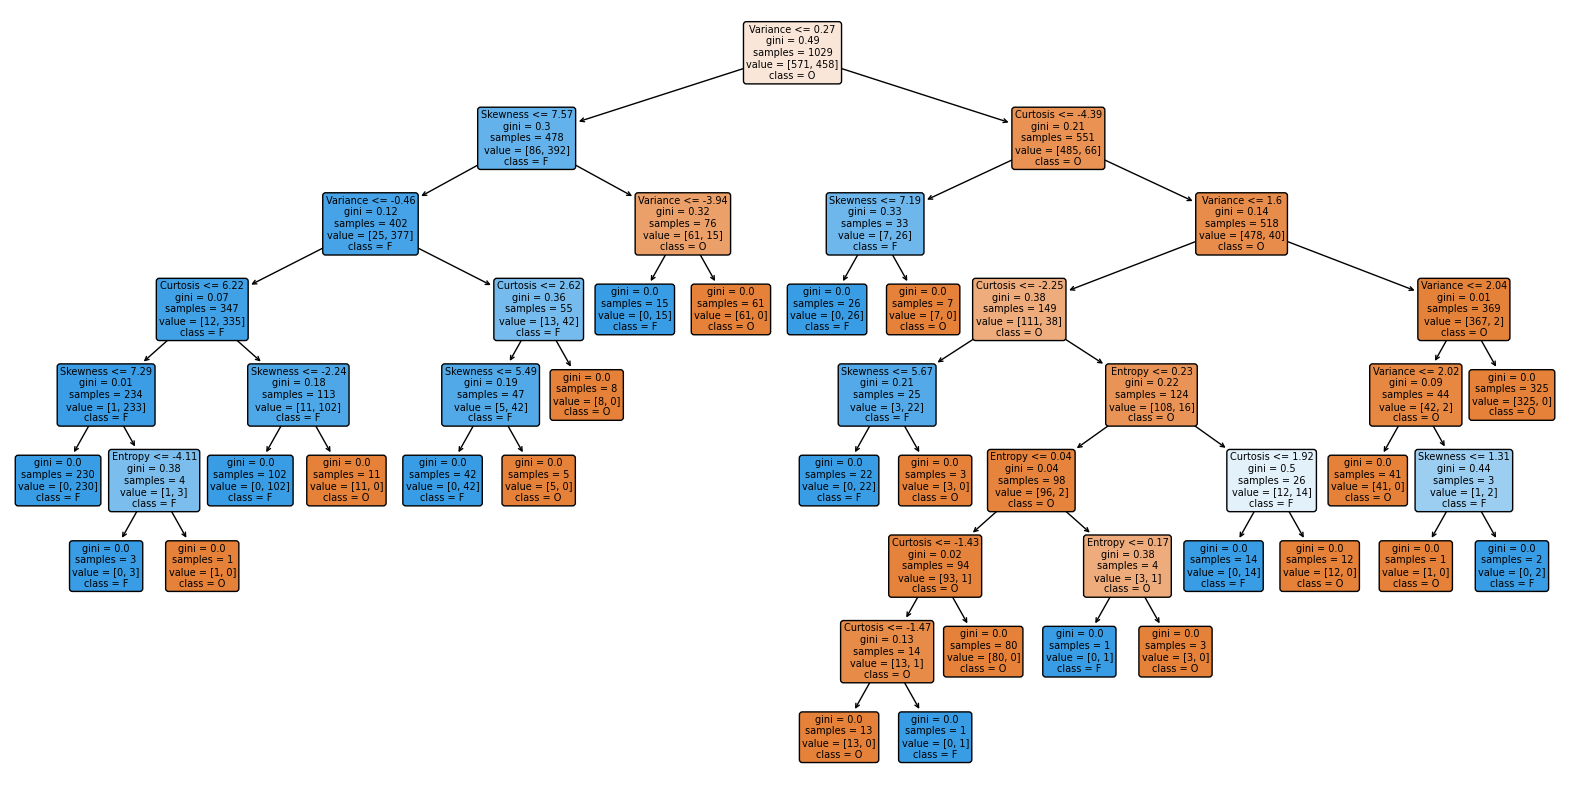

In [62]:
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=x.columns, class_names=['O','F'], 
         filled=True, rounded=True, precision=2, fontsize=7);
plt.savefig('tree.png')

#### Feature Importances

<BarContainer object of 4 artists>

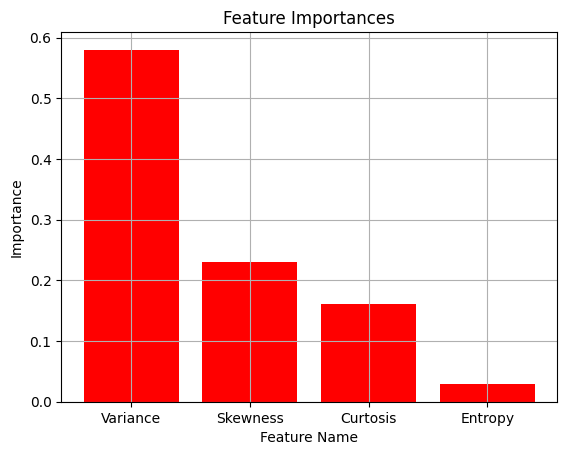

In [65]:
plt.title('Feature Importances')
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.grid()
plt.bar(x.columns, dt.feature_importances_, color = 'r')

In [66]:
dt.feature_importances_ * 100

array([58.01130677, 23.02097517, 16.12111223,  2.84660583])

#### Performance Evaluation

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [70]:
# predict on unknown data 
y_pred = dt.predict(x_test)

In [71]:
accuracy_score(y_test, y_pred)

0.9766763848396501

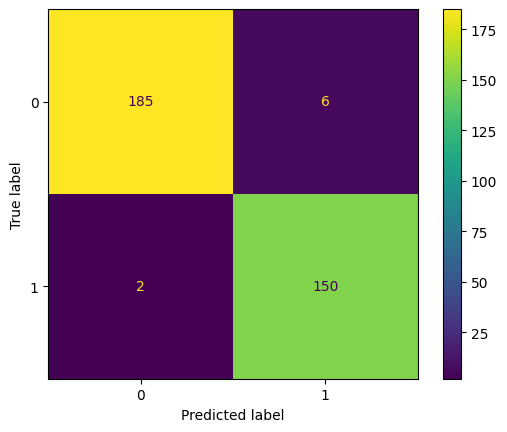

In [72]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [73]:
335/343

0.9766763848396501

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       191
           1       0.96      0.99      0.97       152

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



In [75]:
newdf = pd.DataFrame(
    data= [[3.3397,-4.6145,3.9823,-0.23751],
           [2.6718,5.6574,0.72974,-1.4892],
           [-6.1536,7.9295,0.61663,-3.2646],
           [-3.9172,2.6652,0.78886,-0.7819]], columns=x.columns)

In [76]:
newdf

,Variance,Skewness,Curtosis,Entropy
0,3.3397,-4.6145,3.98230,-0.23751
1,2.6718,5.6574,0.72974,-1.48920
2,-6.1536,7.9295,0.61663,-3.26460
3,-3.9172,2.6652,0.78886,-0.78190


In [77]:
dt.predict(newdf)

array([0, 0, 1, 1])

#### Decision Tree on Social_Network_Ads.csv

In [86]:
df = pd.read_csv('Social_Network_Ads.csv')

x =  df[['Age','EstimatedSalary']]
y = df['Purchased']

x_train ,x_test, y_train, y_test = train_test_split(
    x, y, random_state=0) 

dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

In [87]:
accuracy_score(y_test, y_pred)

0.9

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93        68
           1       0.82      0.88      0.85        32

    accuracy                           0.90       100
   macro avg       0.88      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



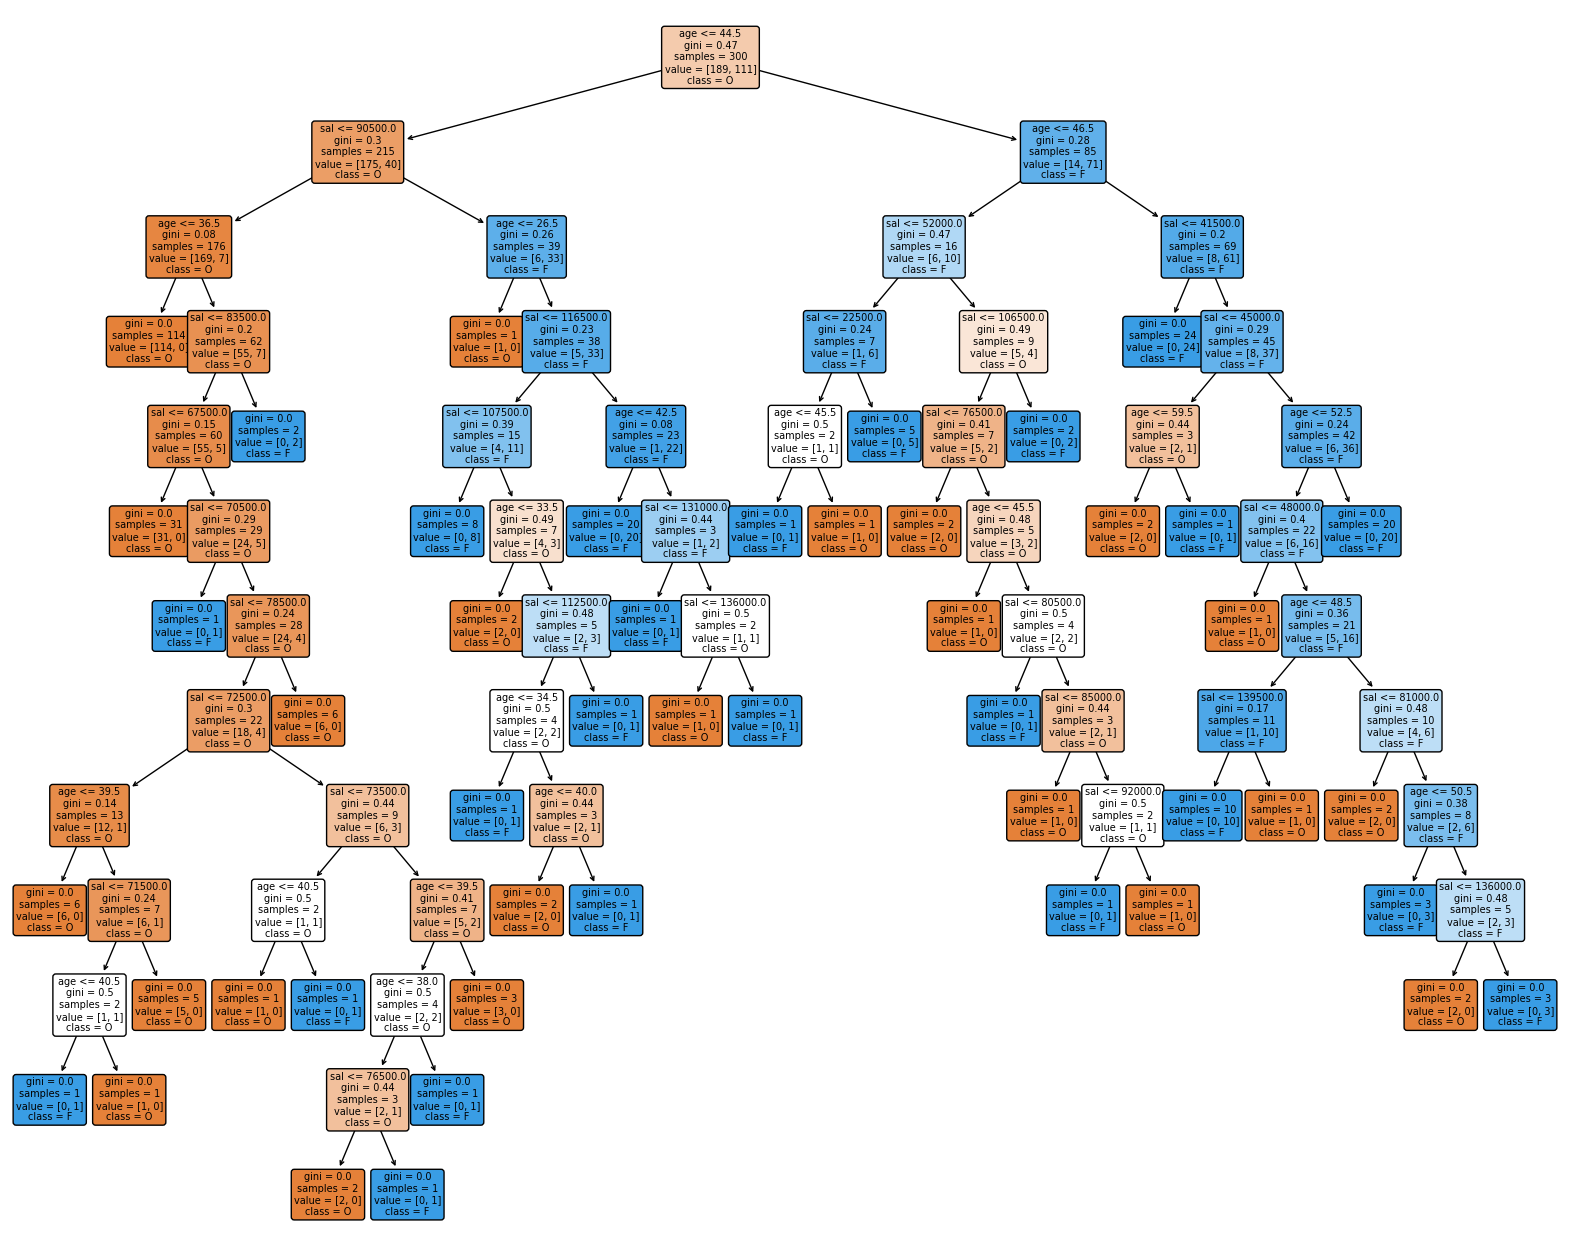

In [91]:
plt.figure(figsize=(20,16))
plot_tree(dt, feature_names=['age','sal'], class_names=['O','F'], 
         filled=True, rounded=True, precision=2, fontsize=7);
plt.savefig('tree.png')